In [40]:
import multi_armed_bandit as mab
import random as r
import numpy as np

money_total = 1000
max_turns = 10000

number_machines = mab.get_num_slot_machines()
machines = [[i, 0, 0, 0] for i in range(number_machines)] #[machine_no, num_pulls, avg_return_ratio, varience
total_rot = []
turn_rot = []

#Improve This! Challenge!
def bet(money_total, turn, machine):
    return 10

#Improve This! Challenge!
def E(money_total, turn):
    return .05

def use_machine(num, machines, total_rot, turn_rot, money_total):
    
    b = bet(money_total, i, machines[0]) #figure out how much money to wager
    ret = mab.use_machine(machines[0][0], b) - b #make the wager
    machines[num][1] += 1 #update pulls
    ratio = ret / float(b)
    machines[num][2] = (machines[num][2] * (machines[num][1] - 1) + ratio) / (machines[num][1]) #update avg ratio
    machines[num][3] = (machines[num][3] * (machines[num][1] - 1) + ((ratio - machines[num][2]) ** 2)) / (machines[num][1]) #update varience
    new_money_total = money_total + ret
    total_rot.append(new_money_total / float(money_total)) #keep track of gain ratio over time
    turn_rot.append(ratio)
    return new_money_total

for i in range(max_turns):
    #sort the list of machines
    machines = sorted(machines, key=lambda m: m[2], reverse=True)
    if r.random() > E(money_total, i): #choose the best known option
        money_total = use_machine(0, machines, total_rot, turn_rot, money_total)
    else: #choose a random option
        money_total = use_machine(r.randint(0, number_machines - 1), machines, total_rot, turn_rot, money_total)
        

/home/steich/.local/lib/python3.5/site-packages/numpy/lib/function_base.py:1110: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/steich/.local/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


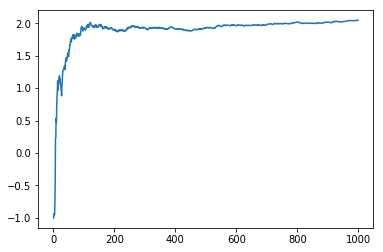

In [41]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

avg_total_rot = [np.average(total_rot[0:i]) for i in range(len(total_rot))]
avg_turn_rot = [np.average(turn_rot[0:i]) for i in range(len(turn_rot))]
plt.plot(range(1000), avg_turn_rot[0:1000])

In [42]:
machines

[[5, 9524, 2.0303863922721774, 3.5416590978013747],
 [3, 55, 1.9472727272727273, 3.3752450963385443],
 [6, 60, 1.9150000000000007, 2.1232026688670316],
 [8, 46, 1.8978260869565218, 2.6839298571134362],
 [4, 43, 1.8953488372093024, 3.3180332873773235],
 [2, 49, 1.8408163265306123, 3.3749498229236683],
 [0, 41, 1.8292682926829265, 2.912325675554469],
 [7, 44, 1.788636363636364, 2.679000779463683],
 [1, 52, 1.7884615384615385, 2.8603136026903164],
 [10, 40, 1.6424999999999996, 3.1587774091184047],
 [9, 46, 1.5652173913043481, 2.7186870750929715]]

In [43]:
money_total

203028